Enter experimental data file: dbCOT-mCF3-exp.csv
Enter simulation data file: dbCOT-Ph-mCF3-DCM-ECD.out.cd.dat
The average difference between the peaks of the experimental data simulated data are 36.9 nm
Set spectra title: Original data
Set spectra title: Phase shifted data


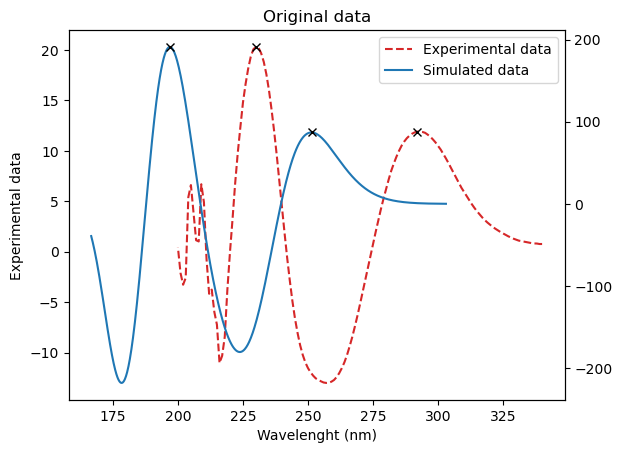

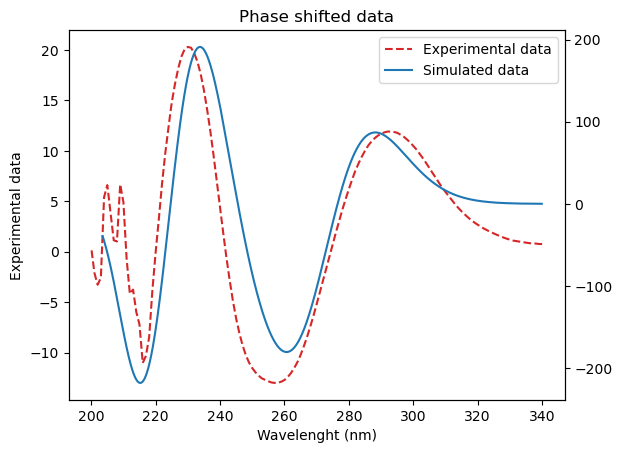

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks
import numpy as np

def process_data():
    
    def import_data():
    
        allowed_formats = ['.csv', '.dat']

        while True:
            exp_data = input('Enter experimental data file: ')
            if exp_data.endswith(tuple(allowed_formats)):
                break
            else:
                print('The experimental data input file is not of correct format. Use only .csv and .dat files')

        while True:
            sim_data = input('Enter simulation data file: ')
            if sim_data.endswith(tuple(allowed_formats)):
                break
            else:
                print('The simulation data input file is not of correct format. Use only .csv and .dat files')
    
        return exp_data, sim_data
    
    imported_data = import_data()
    
    exp_data_inp = pd.read_csv(imported_data[0], sep=';', decimal=',', header=None)
    sim_data_inp = pd.read_csv(imported_data[1], sep='\s+', header=None)
    
    def energy_conversion(energy_data):
        return [10000000 / E for E in energy_data]

    def energy_conversion_phase_shift(energy_data, phase_shift):
        return [10000000 / E + phase_shift for E in energy_data]
        
    #Implement phase shift suggestion using scipy peak finder
    exp_intensities = exp_data_inp[1].to_numpy()
    peaks, _ = find_peaks(exp_intensities, height=10) #Set threshehold value to exclude noisy data 

    
    sim_intensities = sim_data_inp[1].to_numpy()
    peaks_sim, _ = find_peaks(sim_intensities)

    
    #Calculate suggested phase shift in nm
    nm_exp = exp_data_inp.loc[peaks,[0]].to_numpy()
    nm_sim = sim_data_inp.loc[peaks_sim,[0]].apply(energy_conversion).to_numpy()
 
    
    def average_difference(list1, list2):
        if len(list1) != len(list2):
            raise ValueError("The lists must have the same length.")

        differences = [abs(a - b) for a, b in zip(list1, list2)]
        average = sum(differences) / len(differences)

        return average
    
    diff_nm = average_difference(nm_exp, nm_sim)
    print(f'The average difference between the peaks of the experimental data simulated data are {diff_nm[0]:.1f} nm')
    
    def plot_data(exp_data_x, exp_data_y, sim_data_x, sim_data_y, include_peaks, exp_intensities = exp_intensities, sim_intensities = sim_intensities, sim_data_inp = sim_data_inp):
        #Plot data
        fig, ax1 = plt.subplots()

        title = input('Set spectra title: ')
        color = 'tab:red'
        ax1.set_xlabel('Wavelenght (nm)')
        ax1.set_ylabel('Experimental data')
        plot1, = ax1.plot(exp_data_x, exp_data_y, color = color, linestyle = '--', label = 'Experimental data')


        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel = 'Simulated data'
        plot2, = ax2.plot(sim_data_x, sim_data_y, color = color, label = 'Simulated data')
        ax1.legend(handles = [plot1, plot2])
        ax1.set_title(title)


        #Plot peaks on experimental data
        #Add statement if peak picking should be included 
        if include_peaks == 'yes':
            ax1.plot(exp_data_x[peaks], exp_intensities[peaks], 'x', color = 'k')
            ax2.plot(sim_data_inp.loc[peaks_sim,[0]].apply(energy_conversion), sim_intensities[peaks_sim], 'x', color = 'k')

        else:
            pass
            
        #fig.show()
        plt.savefig(f'{title}.png')

    #First, plot the unshifted ECD spectra
    plot_data(exp_data_inp[0], exp_data_inp[1], energy_conversion(sim_data_inp[0]), sim_data_inp[1], include_peaks = 'yes')
    
    #Plot the suggested phase shift spectra
    plot_data(exp_data_inp[0], exp_data_inp[1], energy_conversion_phase_shift(sim_data_inp[0], diff_nm), sim_data_inp[1], include_peaks = 'No')
    
process_data()